<a href="https://colab.research.google.com/github/SarthakTripathi09/PREDICTION-USING-SUPERVISED-ML/blob/main/TSF_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARK FOUNDATION
#SARTHAK TRIPATHI
#PREDICTION USING SUPERVISED ML

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [15]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


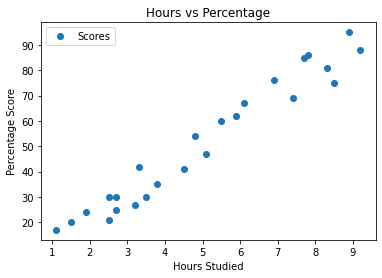

In [82]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Preparing the Data

In [55]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [56]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

In [69]:
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [70]:
print("Training Dataset Shape" ,xtrain.shape , xtest.shape)
print("Testing Dataset Shape",ytrain.shape , ytest.shape)

Training Dataset Shape (20, 1) (5, 1)
Testing Dataset Shape (20,) (5,)


## Training the Model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linear_model = LinearRegression()
linear_model.fit(xtrain,ytrain)

LinearRegression()

In [73]:
#Predicting the Test set results
Y_pred = linear_model.predict(xtest)

In [74]:
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [75]:
ytest

array([20, 27, 69, 30, 62])

In [83]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': ytest, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Visualising the results

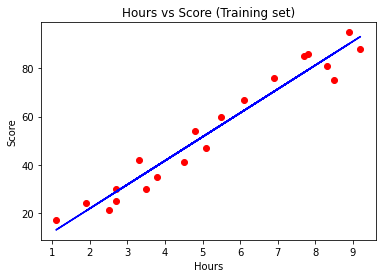

In [76]:
#Visualising the Training set results
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(xtrain, linear_model.predict(xtrain), color = 'blue')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

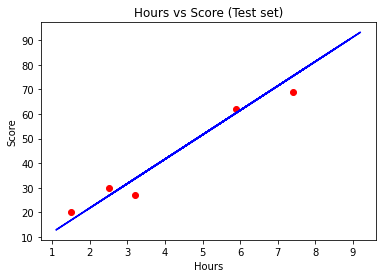

In [77]:
#Visualising the Test set results
plt.scatter(xtest, ytest, color = 'red')
plt.plot(xtrain, linear_model.predict(xtrain), color = 'blue')
plt.title('Hours vs Score (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

## Making Final Predictions

In [78]:
#making a single prediction
print(linear_model.predict([[9.25]]))

[93.69173249]


In [79]:
print(linear_model.coef_)
print(linear_model.intercept_)

[9.91065648]
2.018160041434662


## Evaluating the Model

In [84]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(ytest, Y_pred)) 

Mean Absolute Error: 4.183859899002982
